## Fasttext

following tutorial https://fasttext.cc/docs/en/supervised-tutorial.html

## TODO
- prepare an input file with categories and their keywords
- prepare input file with categories and single keywords
- split datasets in training and validation
- run simple model settings (default as above)
- balance datasets for training 
 - feed GOOOGLE search words!

 
- try to use it as a word vectorizer and measure distance?

In [7]:
## load the data
import sys
# Add src folder to the path
sys.path.append('../src/')
from data.preprocess_keywords import make_cleaned_keywords_df
from data.make_datasets import get_data
# Specify wanted time range
start_date = '2017-01-01'
end_date = '2022-01-01'
# Path to data
data_file = '/home/anya_m/data/dw-project-data/CMS_2010_to_June_2022_ENGLISH.json'
# Load and extract data within time range
df_subset = get_data(data_file, start_date, end_date)
# Cleans keywords and saves data as a dataframe
#make_cleaned_keywords_df(df_subset, start_date, end_date)

Getting data...
Loading data DONE. Number of articles is 175659
Extracting data DONE. Number of articles from 2017-01-01 to 2022-01-01 is 69432


In [8]:
# Load DW data
import pandas as pd
start_date = '2017-01-01' #'2019-01-01' #'2021-01-01'
end_date = '2022-01-01'
filepath = '../data/interim/clean_keywords_' + start_date + '_' + end_date + '.json'
df = pd.read_json(filepath, orient ='split', compression = 'infer')

In [9]:
#add column teaser to the df cleaned dataframe
df=df.merge(df_subset['teaser'], left_on=df_subset['id'], right_on=df['id'])
df=df.drop(['key_0'], axis=1)
df=df.drop(['keywordStrings'], axis=1)
#add column with full text of the article into the dataframe
# df=df.merge(df_subset['text'], left_on=df['id'], right_on=df_subset['id'] )

In [10]:
#remove all NaN fields
df_clean=df.dropna(how='any')
df_clean_copy = df_clean.copy(deep=True)
##TODO
#df_clean['cleanFocusCategory']=='Law and Justice' replace with Law-and-Justice  and other categories

df_clean['cleanFocusCategory'] = df_clean['cleanFocusCategory'].replace(['Law and Justice'], 'Law-and-Justice')
df_clean['cleanFocusCategory'] = df_clean['cleanFocusCategory'].replace(['Nature and Environment'], 'Nature-and-Environment')
df_clean['cleanFocusCategory'] = df_clean['cleanFocusCategory'].replace(['Human Rights'], 'Human-Rights')
df_clean['cleanFocusCategory'] = df_clean['cleanFocusCategory'].replace(['Cars and Transportation'], 'Cars-and-Transportation')
df_clean['cleanFocusCategory'] = df_clean['cleanFocusCategory'].replace(['Press Freedom'], 'Press-Freedom')
df_clean['cleanFocusCategory'] = df_clean['cleanFocusCategory'].replace(['Digital World'], 'Digital-World')
df_clean['cleanFocusCategory'] = df_clean['cleanFocusCategory'].replace(['Rule of Law'], 'Rule-of-Law')
df_clean['cleanFocusCategory'] = df_clean['cleanFocusCategory'].replace(['Learning German'], 'Learning-German')
df_clean['cleanFocusCategory'] = df_clean['cleanFocusCategory'].replace(['Freedom of Speech'], 'Freedom-of-Speech')

/home/anya_m/Documents/git_dw/venv/lib64/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/anya_m/Documents/git_dw/venv/lib64/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/anya_m/Documents/git_dw/venv/lib64/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [11]:
df_clean['cleanFocusCategory'].unique()

array(['History', 'Politics', 'Society', 'Culture', 'Media',
       'Law-and-Justice', 'Catastrophe', 'Lifestyle', 'Business',
       'Travel', 'Sports', 'Science', 'Health', 'Nature-and-Environment',
       'Cars-and-Transportation', 'Education', 'Religion', 'Human-Rights',
       'Technology', 'Learning-German', 'Digital-World', 'Migration',
       'Offbeat', 'Innovation'], dtype=object)

In [12]:
df_clean_single_kw=df_clean.explode('keywordStringsCleanAfterFuzz')

label=df_clean['cleanFocusCategory'].apply(lambda x: ('__label__' +x+' '))
kw=df_clean['keywordStringsCleanAfterFuzz'].apply(lambda x: (', '.join(x)))
teaser=df_clean['teaser']


In [13]:
df_clean_single_kw=df_clean_single_kw.dropna(how='any')

In [14]:
single_kw_label=df_clean_single_kw['cleanFocusCategory'].apply(lambda x: ('__label__' +x+' '))
single_kw=df_clean_single_kw['keywordStringsCleanAfterFuzz']
print(single_kw_label+single_kw)

0           __label__History margaret thatcher
0                 __label__History helmut kohl
0        __label__History german reunification
0                 __label__History berlin wall
0                     __label__History britain
                         ...                  
69431                   __label__Health france
69431            __label__Health birth control
69431            __label__Health contraception
69431           __label__Health contraceptives
69431      __label__Health reproductive health
Length: 358724, dtype: object


In [15]:
# print(label+teaser)

In [16]:
# print(label+kw)

In [17]:
label_kw=label+kw
label_single_kw=single_kw_label+single_kw
label_teaser=label+teaser

In [18]:
# split dataset into train and test subsets
import numpy as np
from sklearn.model_selection import train_test_split as tts

def split_dataset(dataset, label):
    train_set, test_set=tts(dataset, random_state=0, test_size=0.33, stratify=label)
    return train_set, test_set

In [19]:
label_kw_train,label_kw_test=split_dataset(label_kw,label)
label_single_kw_train,label_single_kw_test=split_dataset(label_single_kw,single_kw_label)
label_teaser_train,label_teaser_test=split_dataset(label_teaser,label)

In [20]:
# # save training/validation file for fasttext
# #label+single keyword (all keywords using pd.explode)
# from tqdm import tqdm
# !rm ./fasttext/single_kw.txt
# with open('./fasttext/single_kw.txt', 'a') as f:
#     for i, el in tqdm(enumerate(single_kw_label)):
#         #print(i)
#         #print(kw[i])
#         print(el+single_kw.iloc[i],file=f)

In [21]:
# # save training/validation file for fasttext
# #label+teaser
# from tqdm import tqdm
# !rm ./fasttext/teaser.txt
# with open('./fasttext/teaser.txt', 'a') as f:
#     for i, el in tqdm(enumerate(label)):
#         #print(i)
#         #print(kw[i])
#         print(el+teaser.iloc[i],file=f)

In [22]:
# # save training/validation file for fasttext
# #label+all DW keywords
# from tqdm import tqdm
# !rm ./fasttext/output.txt
# with open('./fasttext/output.txt', 'a') as f:
#     for i, el in tqdm(enumerate(label)):
#         #print(i)
#         #print(kw[i])
#         print(el+kw.iloc[i],file=f)

In [23]:
import os
def save_txt(out_name,data_to_save):
    from tqdm import tqdm
    #!rm $out_name
    if os.path.isfile(out_name):
        os.remove(out_name)
    with open(out_name,'a') as f:
        for i,el in tqdm(enumerate(data_to_save)):
            print(el,file=f)
    input_file=out_name
    return input_file

In [24]:
all_kw_train=save_txt('./fasttext/all_kw_train.txt',label_kw_train)
all_kw_test=save_txt('./fasttext/all_kw_test.txt',label_kw_test)
#all_kw_train
#!head ./fasttext/all_kw_train.txt

45882it [00:00, 259642.41it/s]
22599it [00:00, 327278.58it/s]


In [25]:
single_kw_train=save_txt('./fasttext/single_kw_train.txt',label_single_kw_train)
single_kw_test=save_txt('./fasttext/single_kw_test.txt',label_single_kw_test)

!cat ./fasttext/single_kw_train.txt | sed -e "s/\([.\!?,'/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > ./fasttext/single_kw_train.preprocessed.txt
!cat ./fasttext/single_kw_test.txt | sed -e "s/\([.\!?,'/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > ./fasttext/single_kw_test.preprocessed.txt

single_kw_train_prec='./fasttext/single_kw_train.preprocessed.txt'
single_kw_test_prec='./fasttext/single_kw_test.preprocessed.txt'


240345it [00:00, 659832.79it/s]
118379it [00:00, 681208.92it/s]


In [26]:
teaser_train=save_txt('./fasttext/teaser_train.txt',label_teaser_train)
teaser_test=save_txt('./fasttext/teaser_test.txt',label_teaser_test)

!cat ./fasttext/teaser_train.txt | sed -e "s/\([.\!?,'/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > ./fasttext/teaser_train.preprocessed.txt
!cat ./fasttext/teaser_test.txt | sed -e "s/\([.\!?,'/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > ./fasttext/teaser_test.preprocessed.txt

teaser_train_prec='./fasttext/teaser_train.preprocessed.txt'
teaser_test_prec='./fasttext/teaser_test.preprocessed.txt'


45882it [00:00, 349900.28it/s]
22599it [00:00, 432635.95it/s]


### Trying Fasttext
- DW all kw + DW cats  - training + validation
- DW all kw for training, DW single kw for validation
- DW single kw for training + validation
- DW teaser + DW cats          - training + validation

implement train_test_split for splitting dataset

- DW teaser / kw for training , google for ???
- - validation based on similarity of google to DW kw (rapidfuzz? cdist / word embeddings using fasstext)

- - make graphics to compare categories from DW and Google

- DW text for training, DW kw for validation
- - clean html (beautiful soup?)

In [27]:
import fasttext

In [28]:
#splitiing dataset into training and validation sets

!head -n 50000 ./fasttext/output.txt > ./fasttext/output.train
!tail -n 20000 ./fasttext/output.txt > ./fasttext/output.valid

In [29]:
#splitiing dataset into training and validation sets
!cat ./fasttext/output.txt | sed -e "s/\([.\!?,'/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > ./fasttext/output.preprocessed.txt

!head -n 50000 ./fasttext/output.preprocessed.txt > ./fasttext/output_cl.train
!tail -n 20000 ./fasttext/output.preprocessed.txt > ./fasttext/output_cl.valid

In [30]:
# single kw 
#preprocessing and 
#splittig into training and validation sets
!cat ./fasttext/single_kw.txt | sed -e "s/\([.\!?,'/()]\)/ \1 /g" | tr "[:upper:]" "[:lower:]" > ./fasttext/single_kw.preprocessed.txt

!head -n 300000 ./fasttext/single_kw.preprocessed.txt > ./fasttext/single_kw_cl.train
!tail -n 60000 ./fasttext/single_kw.preprocessed.txt > ./fasttext/single_kw_cl.valid

In [31]:
def fasttext_classifier(train_file,test_file,lr=1.0,epoch=12,k=1,wordNgrams=1):
    model = fasttext.train_supervised(input=train_file, lr=lr, epoch=epoch)
    #model.test(test_file,k=k)
    print(model.test(test_file,k=1))
    print(model.test(test_file,k=2))
    print(model.test(test_file,k=3))
    print(model.test(test_file,k=4))
    print(model.test(test_file,k=5))
    return model

In [32]:
model_all_kw_check=fasttext_classifier(all_kw_train,all_kw_test,lr=0.7)
#model_all_kw_check.test(all_kw_test)

Read 0M words
Number of words:  36772
Number of labels: 24
Progress: 100.0% words/sec/thread:  437245 lr:  0.000000 avg.loss:  0.596297 ETA:   0h 0m 0s


(22599, 0.6906500287623346, 0.6906500287623346)
(22599, 0.412717376875083, 0.825434753750166)
(22599, 0.2952048025723852, 0.8856144077171556)
(22599, 0.22936855613080226, 0.917474224523209)
(22599, 0.1873180229213682, 0.936590114606841)


In [ ]:
model_single_kw_check=fasttext_classifier(single_kw_train,single_kw_test,lr=0.7,wordNgrams=1)
#model_single_kw_check.test(single_kw_test)

In [ ]:
model_single_kw_check=fasttext_classifier(single_kw_train,single_kw_test,lr=0.7,wordNgrams=5)
#model_single_kw_check.test(single_kw_test)

In [ ]:
model_single_kw_check_prec=fasttext_classifier(single_kw_train_prec,single_kw_test_prec,lr=0.7)
#model_single_kw_check_prec.test(single_kw_test_prec)

In [ ]:
model_teaser=fasttext_classifier(teaser_train,teaser_test)

In [ ]:
model_teaser=fasttext_classifier(teaser_train_prec,teaser_test_prec)

In [ ]:
model_teaser_single=fasttext_classifier(teaser_train_prec,single_kw_test_prec)

In [ ]:
model_best_all_single = fasttext.train_supervised(input="./fasttext/output.preprocessed.txt", autotuneValidationFile="./fasttext/single_kw.preprocessed.txt")
model_best_all_single.test("./fasttext/single_kw.preprocessed.txt")

In [ ]:
#automatic search for best hyperparameters https://fasttext.cc/docs/en/autotune.html 
#last 5 minutes
train_file="./fasttext/single_kw_cl.train"
valid_file='./fasttext/single_kw_cl.valid'
model_best_single = fasttext.train_supervised(input=train_file, autotuneValidationFile=valid_file)
model_best_single.test(valid_file)

In [ ]:
#automatic search for best hyperparameters https://fasttext.cc/docs/en/autotune.html 
#last 5 minutes
model_best = fasttext.train_supervised(input=train_file, autotuneValidationFile='./fasttext/output_cl.valid')
model_best.test('./fasttext/output_cl.valid')

In [ ]:
#The output are the number of samples (here 14999), 
# the precision at one (0.6968)  69% and 
# the recall at one (0.0541).

#The precision is the number of correct labels among the labels predicted by fastText. 
# The recall is the number of labels that successfully were predicted,
# among all the real labels. 

With a few steps, we were able to go from a precision at one of 12.4% to 59.9%. Important steps included:

- preprocessing the data ;
- changing the number of epochs (using the option -epoch, standard range [5 - 50]) ;
- changing the learning rate (using the option -lr, standard range [0.1 - 1.0]) ;
- using word n-grams (using the option -wordNgrams, standard range [1 - 5]).

In [ ]:
# classifier with cleaned teaser tested on teaser
train_file="./fasttext/teaser_cl.train"
model_file="./fasttext/model_teaser_cl_output.bin"
test_file="./fasttext/teaser_cl.valid"

model_teaser_cl = fasttext.train_supervised(input=train_file, lr=0.9, epoch=25)
#saving the model
model_teaser_cl.save_model(model_file)
#test model

model_teaser_cl.test(test_file)

In [ ]:
# classifier with cleaned teaser tested on DW kw
train_file="./fasttext/teaser.preprocessed.txt" #all cleaned teasers +cat
model_file="./fasttext/model_teaser_pred_kw.bin"
test_file="./fasttext/output.preprocessed.txt" #all cleaned dw kw + cat

model_teaser_kw = fasttext.train_supervised(input=train_file, lr=1.0, epoch=12)
#saving the model
model_teaser_kw.save_model(model_file)
#test model

model_teaser_kw.test(test_file)

In [ ]:
# classifier with cleaned teaser tested on DW kw
train_file="./fasttext/teaser.preprocessed.txt" #all cleaned teasers +cat
model_file="./fasttext/model_teaser_pred_kw.bin"
test_file="./fasttext/output.preprocessed.txt" #all cleaned dw kw + cat

model_teaser_kw = fasttext.train_supervised(input=train_file, lr=1.0, epoch=50, bucket=200000, dim=50, loss='hs')
#saving the model
model_teaser_kw.save_model(model_file)
#test model

model_teaser_kw.test(test_file)

In [ ]:
# classifier with cleaned teaser tested on DW kw
train_file="./fasttext/teaser.preprocessed.txt" #all cleaned teasers +cat
model_file="./fasttext/model_teaser_pred_kw.bin"
test_file="./fasttext/output.preprocessed.txt" #all cleaned dw kw + cat

model_teaser_kw = fasttext.train_supervised(input=train_file, lr=1.0, wordNgrams=5, epoch=50, bucket=200000, dim=50, loss='hs')
#saving the model
model_teaser_kw.save_model(model_file)
#test model

model_teaser_kw.test(test_file)

In [ ]:
#google keywords to dw categories
# Load Google data
df_google = pd.read_json('../data/interim/2021-daily-trending-searches.json', orient ='split', compression = 'infer')

# Keeps only google data within DW data date range
start_date_dw=start_date
end_date_dw=end_date
df_google.sort_values(by ='date', inplace = True) 
mask = (pd.to_datetime(df_google['date']) > start_date_dw) & (pd.to_datetime(df_google['date']) <= end_date_dw)
df_google_subset = df_google.loc[mask].copy()
google_topic=df_google_subset['topic_title']
google_topic_type=df_google_subset['topic_title']

In [ ]:
df_google_subset.head()
#interesting columns:
# df_google_subset['topic_title']
# df_google_subset['topic_type']

In [135]:
#create a table with predicted categories
# column with a single predicted category
selected_keyword='bowl game'

x=(model_all_kw_check.predict(selected_keyword,k=2))



#col_pred1=
#column with two predicted categories
#column with three predicted categories
#column with four predicted categories
#column with five predicted categories

pred_label=x[0][0].split('__')[2]
print(pred_label)
pred_label2=x[0][1].split('__')[2]
print(pred_label2)

Culture
Law-and-Justice


In [270]:
# function to run predictions for a column
def prediction(model, keyword,k=1):
    x=model.predict(keyword,k=k)
    list_label=[]
    for k in range(1,k+1):
        #print(k)
        pred_label=(x[0][k-1].split('__')[2])
        #print(pred_label)
        list_label.append(pred_label)
        #print(list_label)
    #print(list_label)
        tuple_label=tuple(list_label)
    return tuple_label


list_labels=prediction(model_all_kw_check,selected_keyword,k=1)

In [176]:
# y,l=[prediction(model_all_kw_check,selected_keyword,k) for k in range(1,k)]

In [217]:
# d = {'col1': [1, 2], 'col2': [3, 4]}
# df = pd.DataFrame(data=d)

new_labels = single_kw_label.str.split('__').apply(lambda row: row[2])

d={'dw_cat':new_labels,'dw_kw':single_kw}#,'pred_cat1','pred_cat2','pred_cat3','pred_cat4','pred_cat5'}
df_single=pd.DataFrame(data=d)

In [286]:
list_of_series = []
for selected_keyword in single_kw[:1000]:
    list_of_k = [k for k in range(1,5)]
    predictions = [prediction(model_all_kw_check,selected_keyword,k=i) for i in list_of_k]
    predictions = pd.Series(predictions, index=list_of_k, name=selected_keyword)
    list_of_series.append(predictions)

result = pd.concat(list_of_series, axis=1).T

In [287]:
result
#result['true_label'] = df_single['dw_cat']
result=result.merge(df_single, left_index=True, right_on='dw_kw')

In [260]:
#(df_single['dw_cat']=='Politics').value_counts()
df_single['dw_cat'].value_counts()

Politics                    137698
Culture                      33363
Business                     29575
Sports                       27788
Law-and-Justice              23989
Nature-and-Environment       22919
Society                      22762
Health                       12962
Science                       8551
Media                         6869
Catastrophe                   6460
Human-Rights                  5744
Travel                        5228
History                       3331
Religion                      2811
Technology                    2248
Lifestyle                     1618
Cars-and-Transportation       1493
Education                     1491
Migration                      995
Digital-World                  544
Offbeat                        173
Learning-German                 88
Innovation                      24
Name: dw_cat, dtype: int64

In [246]:
# for i in df_single['dw_cat'].unique():
#     df_single['dw_cat'].value_counts()
# #fc.value_counts()

In [273]:
# val_counts_for_cols = []
# for col in result.columns:
#     val_counts = result[col].value_counts()
#     val_counts_for_cols.append(val_counts)

# val_counts_for_cols = pd.concat(val_counts_for_cols, axis=1)

In [288]:
val_counts_for_cols = {}
for col in result.columns:
    val_counts = result[col].value_counts()
    val_counts_for_cols[col] = val_counts

In [347]:
val_counts_for_cols = {}
for col in result.columns:
    val_counts = result.explode(col)[col].value_counts()
    val_counts_for_cols[col] = val_counts

In [352]:
val_counts_for_cols[4]

Politics                   407769
Law-and-Justice            257341
Society                    250744
Sports                     138935
Business                   136596
Travel                     131443
Culture                    113380
Media                       71011
Health                      48966
Human-Rights                44030
Catastrophe                 36103
Nature-and-Environment      21537
Offbeat                     18106
Innovation                  18088
Technology                  17328
Education                   13963
Lifestyle                    9697
History                      8292
Learning-German              7812
Cars-and-Transportation      5465
Digital-World                1709
Religion                     1589
Migration                     873
Science                       247
Name: 4, dtype: int64

In [300]:
val_counts_for_cols['dw_cat'].values
val_counts_for_cols['dw_cat'].index

array([220682,  31475,  30493,  27753,  27209,  25220,  23616,  12223,
         8405,   6873,   5226,   4086,   2628,   2569,   2303,   2181,
         1714,   1689,   1687,   1467,    420,    291,     24,     22])

In [303]:
val_counts_for_cols['dw_cat'].values
val_counts_for_cols['dw_cat'].index

Index(['Politics ', 'Culture ', 'Law-and-Justice ', 'Society ',
       'Nature-and-Environment ', 'Business ', 'Sports ', 'Health ', 'Travel ',
       'Human-Rights ', 'Catastrophe ', 'Media ', 'Science ', 'History ',
       'Religion ', 'Technology ', 'Migration ', 'Cars-and-Transportation ',
       'Lifestyle ', 'Education ', 'Digital-World ', 'Offbeat ',
       'Learning-German ', 'Innovation '],
      dtype='object')

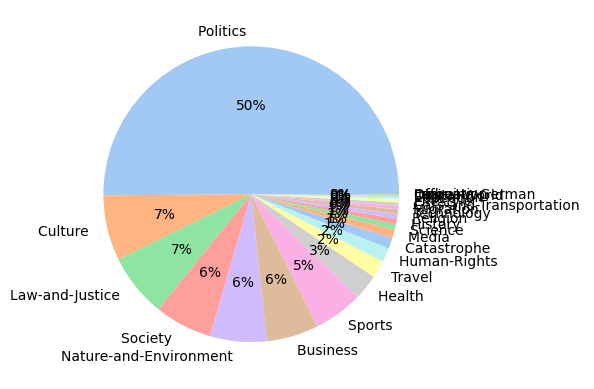

In [353]:
import matplotlib.pyplot as plt
import seaborn as sns

#define data
data = val_counts_for_cols['dw_cat'].values
labels = val_counts_for_cols['dw_cat'].index

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:25]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

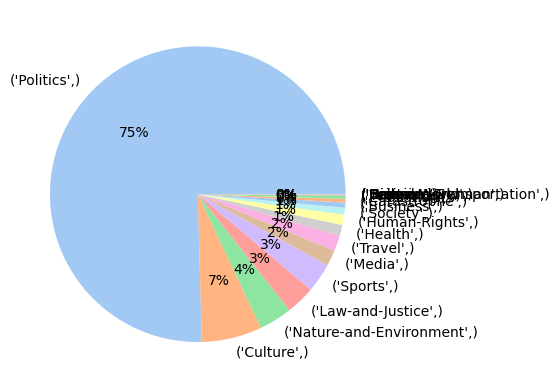

In [310]:
import matplotlib.pyplot as plt
import seaborn as sns

#define data
data = val_counts_for_cols[1].values
labels = val_counts_for_cols[1].index

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:25]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

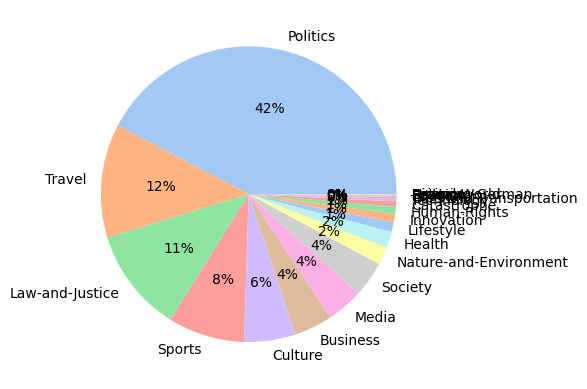

In [354]:
import matplotlib.pyplot as plt
import seaborn as sns

#define data
data = val_counts_for_cols[2].values
labels = val_counts_for_cols[2].index

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:25]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

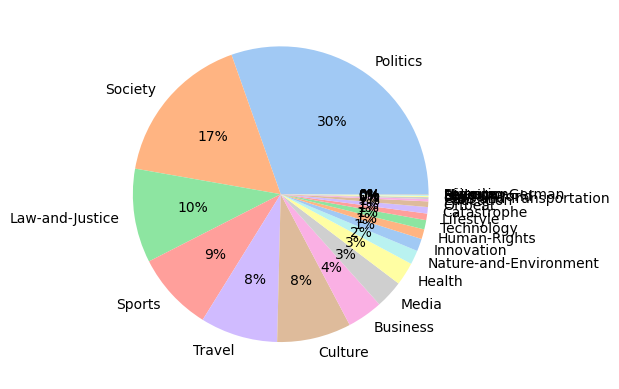

In [355]:
import matplotlib.pyplot as plt
import seaborn as sns

#define data
data = val_counts_for_cols[3].values
labels = val_counts_for_cols[3].index

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:25]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

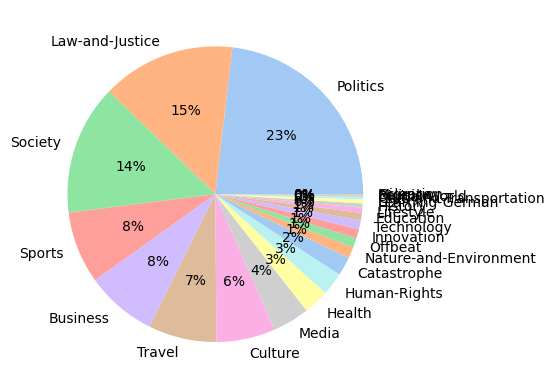

In [356]:
import matplotlib.pyplot as plt
import seaborn as sns

#define data
data = val_counts_for_cols[4].values
labels = val_counts_for_cols[4].index

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:25]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [314]:
val_counts_for_cols[2].index

Index([                       ('Politics', 'Travel'),
                     ('Politics', 'Law-and-Justice'),
                              ('Politics', 'Sports'),
                            ('Politics', 'Business'),
                             ('Politics', 'Society'),
                               ('Politics', 'Media'),
                     ('Law-and-Justice', 'Politics'),
       ('Nature-and-Environment', 'Law-and-Justice'),
                             ('Politics', 'Culture'),
                              ('Politics', 'Health'),
       ...
                           ('Catastrophe', 'Sports'),
                              ('Culture', 'History'),
                       ('Sports', 'Learning-German'),
                             ('Politics', 'History'),
                       ('Business', 'Digital-World'),
                         ('Culture', 'Human-Rights'),
             ('Business', 'Cars-and-Transportation'),
                              ('Business', 'Sports'),
                 

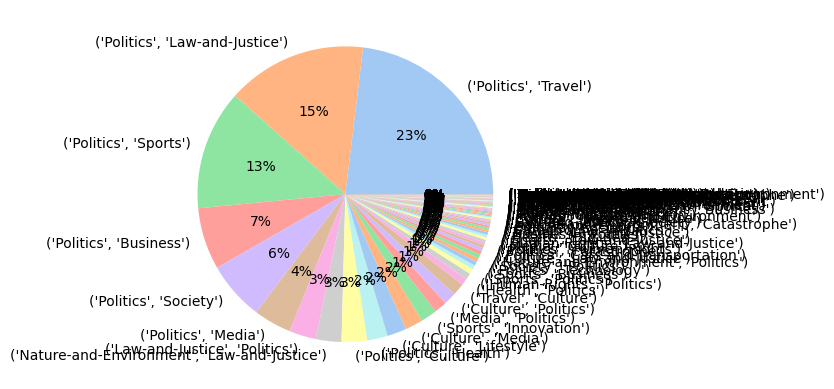

In [311]:
import matplotlib.pyplot as plt
import seaborn as sns

#define data
data = val_counts_for_cols[2].values
labels = val_counts_for_cols[2].index

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:25]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [ ]:
# # Skipgram model :
# model = fasttext.train_unsupervised('data.txt', model='skipgram')

# # or, cbow model :
# model = fasttext.train_unsupervised('data.txt', model='cbow')


# print(model.words)   # list of words in dictionary
# print(model['king']) # get the vector of the word 'king'